In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import the libraries necessary for random choice
import random

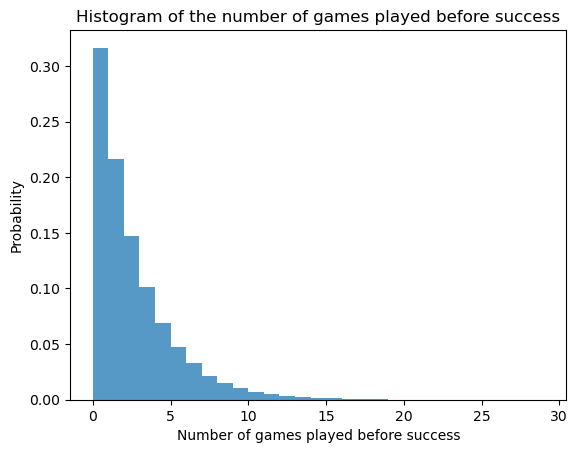

In [2]:
p_success = 12 / 38 # thirds betting on roulette
p_fail = 1 - p_success
dollars_per_chip = 5
max_bet = 1000
max_payout = 10000

# histogram of the number of games played before success
n = 100000
games = np.zeros(n)
for i in range(n):
    # keep choosing a random number from 1 to 38 until we get between 1 and 12
    count = 0
    while random.randint(1, 38) > 12:
        count += 1
    games[i] = count

plt.hist(games, bins=range(30), density=True, alpha=0.75)
plt.xlabel('Number of games played before success')
plt.ylabel('Probability')
plt.title('Histogram of the number of games played before success')
plt.show()


In [8]:
'''
Define betting strategies
and define a function to run a roulette game
'''

fib_list = [2, 3]
def fibonacci_bet(n):
    if n < len(fib_list):
        return fib_list[n]
    else:
        fib_list.append(fibonacci_bet(n-1) + fibonacci_bet(n-2))
        return fib_list[n]
    
def exponential_bet(n):
    return 2**n

def linear_bet(n):
    return 2*n

def roulette_run(starting_chips = 200, max_iter = 100):
    '''
    inputs:
    starting_chips: int, number of chips to start with
    max_iter: int, maximum number of iterations to run

    outputs:
    chips_list: list, list of number of chips after each iteration

    STRATEGY:
    - bet 2 chips on the first round
    - if you lose, bet chips according to the fibonacci sequence. 
    If the bet is greater than the number of chips you have, bet all your chips.
    - if you win, bet 2 chips again
    - stop at an exact number of rounds
    '''
    chips = starting_chips
    chips_list = []
    seq_id = 0
    for i in range(max_iter):
        if chips <= 0:
            chips_list.append(0)
            continue
        elif chips >= max_payout:
            chips_list.append(max_payout)
            continue
        chips_list.append(chips)
        bet = exponential_bet(seq_id) # CHANGE HERE FOR DIFFERENT BETTING STRATEGIES
        if bet > max_bet:
            bet = max_bet
        if bet > chips:
            bet = chips
        if random.randint(1, 38) > 12:
            chips -= bet
            seq_id += 1
        else:
            winning = 3*bet
            chips += winning
            seq_id = 0
    return chips_list

In [13]:
'''
Run simulations
'''

# run the roulette game a few times and plot the results on the same graph
n_visits = 100
max_iter = 200
starting_chips = 40

results_array = np.zeros((n_visits, max_iter))
for i in range(n_visits):
    results_array[i] = roulette_run(starting_chips=starting_chips, max_iter=max_iter)

Probability of going broke after 200 rounds during a visit: 0.9


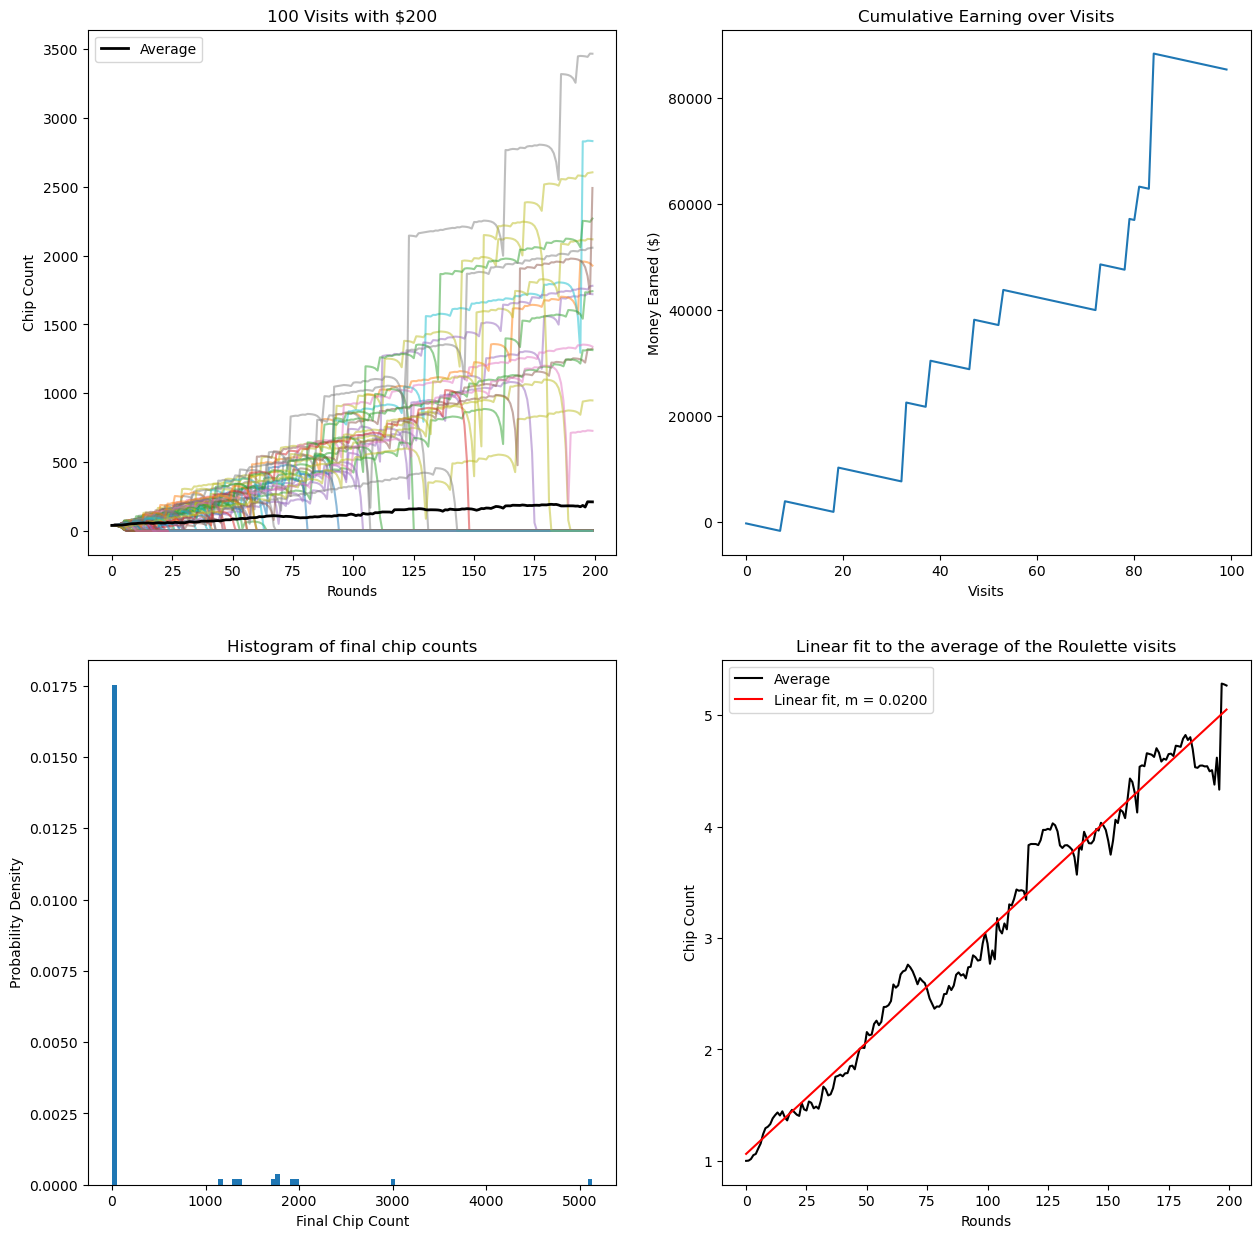

In [14]:
'''
Plot the results
'''

# Make a 2 by 2 plot of the results
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for i in range(n_visits):
    axs[0,0].plot(roulette_run(starting_chips=starting_chips, max_iter=max_iter), alpha=0.5)
# calculate average and plot on same plot
average = np.mean(results_array, axis=0)
axs[0,0].plot(average, color='black', linewidth=2, label='Average')
axs[0,0].set_title(f'{n_visits} Visits with ${starting_chips*dollars_per_chip}')
axs[0,0].set_xlabel('Rounds')
axs[0,0].set_ylabel('Chip Count')
axs[0,0].legend()

# plot the total money after each run
profit_array = results_array[:, -1] - starting_chips
# plot the integral of the profit
chips_over_time = np.cumsum(profit_array)*dollars_per_chip
axs[0,1].plot(chips_over_time)
axs[0,1].set_title('Cumulative Earning over Visits')
axs[0,1].set_xlabel('Visits')
axs[0,1].set_ylabel('Money Earned ($)')

# plot the histogram of the results
axs[1,0].hist(results_array[:, -1], density=True, bins=100)
axs[1,0].set_title('Histogram of final chip counts')
axs[1,0].set_xlabel('Final Chip Count')
axs[1,0].set_ylabel('Probability Density')


# calculate the probability of going broke
n_broke = np.sum(results_array[:, -1] == 0)
p_broke = n_broke / n_visits
print(f'Probability of going broke after {max_iter} rounds during a visit: {p_broke}')

# fit a line to the average
x = np.arange(max_iter)
normalised_average = average / starting_chips
m, b = np.polyfit(x, normalised_average, 1)
axs[1,1].plot(normalised_average, label='Average', color='black')
axs[1,1].plot(m*x + b, label=f'Linear fit, m = {m:.4f}', color='red')
axs[1,1].set_title('Linear fit to the average of the Roulette visits')
axs[1,1].set_xlabel('Rounds')
axs[1,1].set_ylabel('Chip Count')
axs[1,1].legend()
plt.show()
